# Concevez une application au service de la santé publique 2: Analyse

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

# Sommaire

# I Analyse univariée

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import missingno as msno

In [2]:
df = pd.read_csv("./df_app1_clean.csv")
df.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff,f_na
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,...,1.0,2.7,21.2,3.6,4.50,27.50,False,NaN,4.50,3
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,...,-2.0,0.0,144.0,2.4,6.84,153.24,True,False,3.76,4
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,...,1.0,114.3,15.6,7.6,5.50,137.50,False,NaN,5.50,3
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,...,17.0,135.0,4.0,96.0,0.00,235.00,False,NaN,0.00,3
5,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,2.2,15.3,0.5,...,0.0,19.8,61.2,27.2,0.95,109.15,False,NaN,0.05,4


In [3]:
df.describe()

,ecoscore_score_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,diff,f_na
count,22780.000000,33582.000000,29660.000000,29666.000000,29558.000000,13178.000000,29685.000000,28362.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000
mean,57.374890,133.534923,6.143240,13.525712,6.367347,1.732937,5.553402,2.823884,53.039173,56.698923,21.279802,2.735207,132.692585,0.842338,3.042969
std,28.399413,83.310847,7.148024,13.378446,10.072749,1.877616,5.406298,5.528968,61.692662,51.643390,21.043228,3.477330,83.209319,2.139960,1.195380
min,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.630000,0.000000
25%,39.000000,76.000000,1.600000,5.200000,1.200000,0.600000,2.400000,-1.000000,11.200000,24.000000,6.800000,0.200000,75.030000,-0.010000,3.000000
50%,59.000000,119.900000,4.000000,11.200000,3.000000,1.490000,4.300000,2.000000,35.100000,48.000000,16.500000,2.400000,119.000000,0.100000,3.000000
75%,80.000000,158.000000,8.000000,15.800000,9.300000,2.200000,7.300000,4.000000,67.500000,68.000000,28.000000,4.370000,157.107500,1.600000,4.000000
max,124.000000,900.000000,100.000000,98.400000,85.200000,45.500000,92.000000,34.000000,900.000000,393.600000,368.000000,300.000000,900.000000,8.100003,4.000000


In [6]:
X = df.copy()

# On commence par retirer les colonnes que nous n'allons pas utiliser
X.drop(columns=["fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "diff", "f_na", "e_nn", "out_e"], inplace=True)

In [7]:
X.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.50,27.50
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.50,137.50
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.00,235.00
5,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15


In [8]:
X.describe()

,ecoscore_score_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
count,22780.000000,33582.000000,28362.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000
mean,57.374890,133.534923,2.823884,53.039173,56.698923,21.279802,2.735207,132.692585
std,28.399413,83.310847,5.528968,61.692662,51.643390,21.043228,3.477330,83.209319
min,-23.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,76.000000,-1.000000,11.200000,24.000000,6.800000,0.200000,75.030000
50%,59.000000,119.900000,2.000000,35.100000,48.000000,16.500000,2.400000,119.000000
75%,80.000000,158.000000,4.000000,67.500000,68.000000,28.000000,4.370000,157.107500
max,124.000000,900.000000,34.000000,900.000000,393.600000,368.000000,300.000000,900.000000


Répartition typique de l'énergie parmi les macronutriments

<AxesSubplot:>

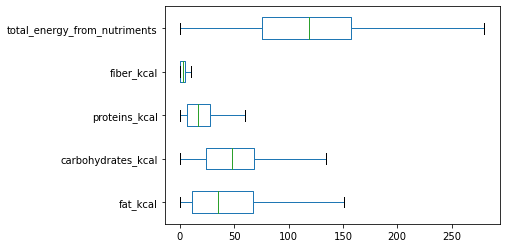

In [16]:
X[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutriments"]].plot(kind="box", vert=False, showfliers=False)

Répartition typique parmi les trois groupes retenus: One-dish meals, Fruits et Milk and yogurt

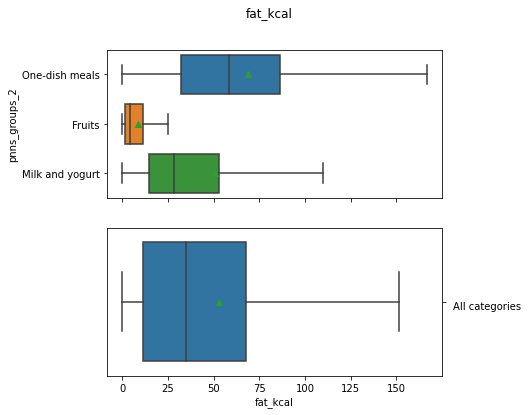

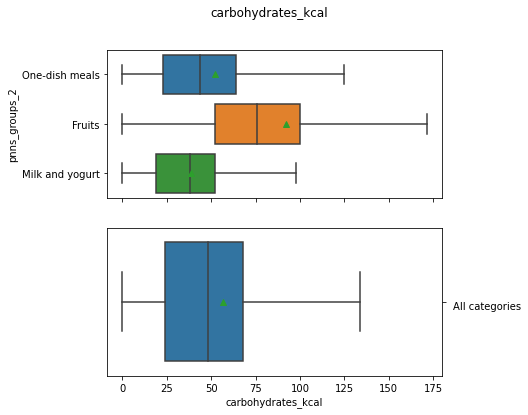

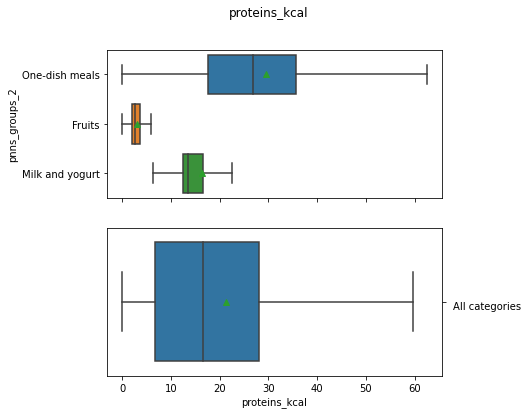

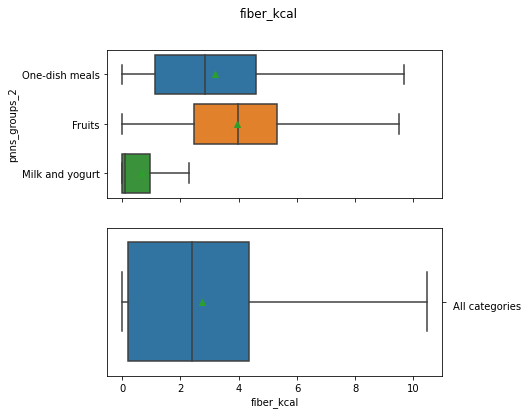

In [42]:
nutricols = ["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]
for c in nutricols:
    fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(6, 6), sharex=True)
    sns.boxplot(x=c,
                y="pnns_groups_2",
                data=X,
                showfliers=False,
                showmeans=True,
                ax=ax1)
    ax1.set_xlabel("")
    
    sns.boxplot(x=c,
                data=X,
                showfliers=False,
                showmeans=True,
                ax=ax2)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_ylabel("All categories", rotation="horizontal", horizontalalignment="left")
    ax2.set_xlabel("")
    
    plt.ylabel("All categories", rotation="horizontal", horizontalalignment="left")
    plt.xlabel(c)
    plt.suptitle(c)
    plt.tight_layout
    plt.show()

Idées:

- pie chart représentant les proportions typiques de fat, carbs, prots et fibers pour chaque pnns_group.
- pie chart représentant les proportions typiques recommandées.
- représenter les valeurs typiques de nutriscore pour chaque catégorie (+ ou - imposé)
- par catégorie de produit, regarder:
    - l'influence de la présence d'un macronutriment sur un autre/les autres
    - la conjonction entre nutriscore et quantités pour les différents macronutriments
- si on veut faire une sélection d'un combo One-dish meals+Milk and yogurt+Fruits, on peut repérer si il y a des combos typiques (à l'aide des catégories?)

In [51]:
odm = X.groupby("pnns_groups_2")[["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]].mean()

In [52]:
odm

,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal
pnns_groups_2,,,,
Fruits,8.427442,92.277510,2.935280,3.949251
Milk and yogurt,50.541955,38.822007,16.410446,0.670829
One-dish meals,69.028105,52.246419,29.459496,3.190753


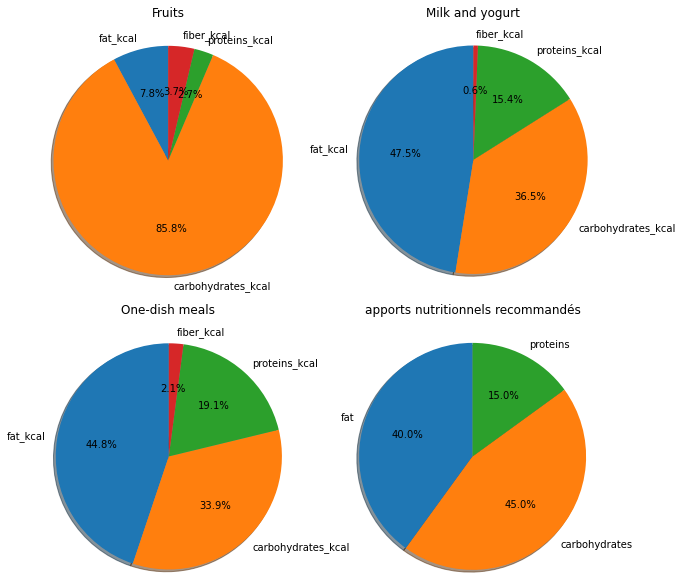

In [76]:
# Apports recommandés
anc = [40, 45, 15]
labels = ["fat", "carbohydrates","proteins"]

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.pie(odm.loc["Fruits"], labels = odm.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Fruits", pad=20)

ax2.pie(odm.loc["Milk and yogurt"], labels = odm.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Milk and yogurt", pad=20)

ax3.pie(odm.loc["One-dish meals"], labels = odm.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("One-dish meals", pad=20)

ax4.pie(anc, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("apports nutritionnels recommandés", pad=20)


plt.tight_layout
plt.show()

In [104]:
nutri = X.groupby("pnns_groups_2").get_group("One-dish meals")

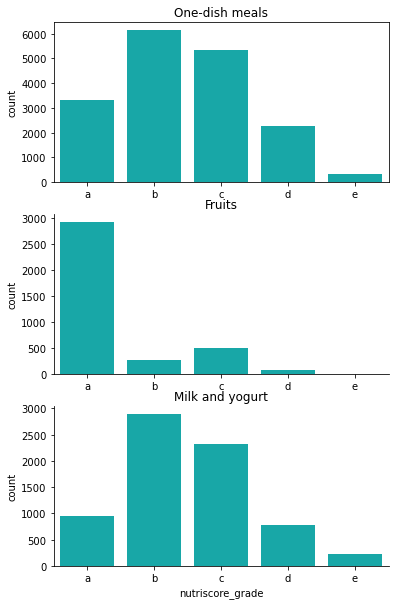

In [131]:
# nutriscore
fig, ((ax1, ax2 ,ax3)) = plt.subplots(nrows=3, figsize=(6, 10))

nutri = X.groupby("pnns_groups_2").get_group("One-dish meals")
sns.countplot(x="nutriscore_grade",
              data=nutri.sort_values(by="nutriscore_grade"),
              color="c",
              ax=ax1
           )
ax1.set_title("One-dish meals")
ax1.set_xlabel("")

nutri = X.groupby("pnns_groups_2").get_group("Fruits")
sns.countplot(x="nutriscore_grade",
              data=nutri.sort_values(by="nutriscore_grade"),
              color="c",
              ax=ax2
           )
sns.despine(ax=ax2)
ax2.set_title("Fruits")
ax2.set_xlabel("")

nutri = X.groupby("pnns_groups_2").get_group("Milk and yogurt")
sns.countplot(x="nutriscore_grade",
              data=nutri.sort_values(by="nutriscore_grade"),
              color="c",
              ax=ax3
           )
ax3.set_title("Milk and yogurt")
sns.despine(ax=ax3)
plt.tight_layout
plt.show()

In [154]:
nutri = X.groupby("nutriscore_grade").mean()
nutri

,ecoscore_score_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
nutriscore_grade,,,,,,,,
a,67.960576,89.623252,-2.749166,21.612003,47.048727,17.450073,3.594435,89.071622
b,49.353810,106.467552,0.998714,39.067415,42.864882,22.524966,2.076934,105.595076
c,56.814914,146.920177,4.600933,60.683229,63.672281,20.317889,2.233839,145.484156
d,46.633513,257.949436,13.395827,159.326872,62.732945,34.334040,1.769980,256.977160
e,30.801980,269.945840,19.816434,146.642027,83.296300,38.388519,1.838418,268.729599


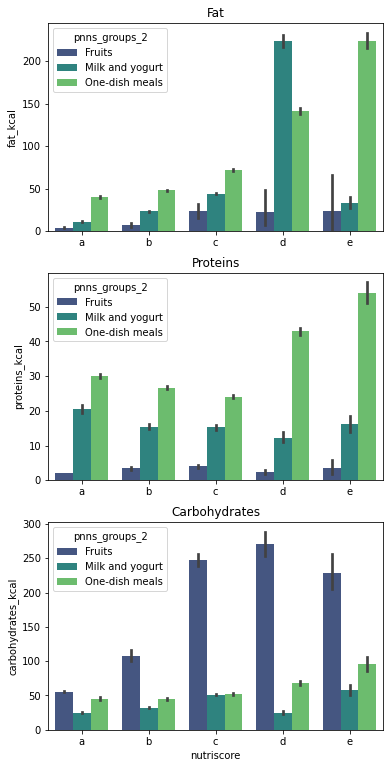

In [159]:
# nutriscore
fig, ((ax1, ax2 ,ax3)) = plt.subplots(nrows=3, figsize=(6, 13))

sns.barplot(x="nutriscore_grade",
            y='fat_kcal',
            data=X.sort_values(by="nutriscore_grade"),
            palette="viridis",
            hue="pnns_groups_2",
            ax=ax1
           )
ax1.set_title("Fat")
ax1.set_xlabel("")

sns.barplot(x="nutriscore_grade",
              y="proteins_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax2
           )
ax2.set_title("Proteins")
ax2.set_xlabel("")

sns.barplot(x="nutriscore_grade",
              y="carbohydrates_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax3
           )
ax3.set_title("Carbohydrates")
ax3.set_xlabel("nutriscore")

plt.tight_layout
plt.show()